## MNIST
In this chapter, we will be using the MNIST dataset, which is a set of 70,000 small
images of digits handwritten by high school students and employees of the US Census
Bureau. 

Each image is labeled with the digit it represents. 

This set has been studied
so much that it is often called the “Hello World” of Machine Learning:

In [13]:
import pandas as pd
import numpy as np
from sklearn.datasets import fetch_mldata

In [15]:
from six.moves import urllib
from sklearn.datasets import fetch_mldata

from scipy.io import loadmat
mnist_alternative_url = "https://github.com/amplab/datascience-sp14/raw/master/lab7/mldata/mnist-original.mat"
mnist_path = "./mnist-original.mat"
response = urllib.request.urlopen(mnist_alternative_url)
with open(mnist_path, "wb") as f:
    content = response.read()
    f.write(content)
mnist_raw = loadmat(mnist_path)
mnist = {
    "data": mnist_raw["data"].T,
    "target": mnist_raw["label"][0],
    "COL_NAMES": ["label", "data"],
    "DESCR": "mldata.org dataset: mnist-original",
}

Success!


Datasets loaded by Scikit-Learn generally have a similar dictionary structure including:
- A DESCR key describing the dataset
- A data key containing an array with one row per instance and one column per feature
- A target key containing an array with the labels

In [16]:
X,y = mnist["data"], mnist["target"]

In [17]:
X.shape

(70000, 784)

In [18]:
y.shape

(70000,)

There are 70,000 images and each image has 784 features.
  - why so many?
       - each image is 28x28 pixels and each feature simply represents one pixel's intensity from 0(white) to 255(black)
        

Let's look at one digit from the dataset.

<b> How? </b>

Grab an instance's feature vector, reshape it to a 28x28 array and display with matplotlib imshow()

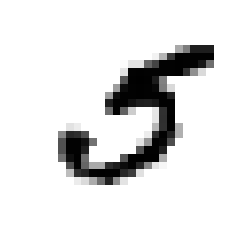

In [19]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

some_digit = X[36000]
some_digit_image = some_digit.reshape(28,28)

plt.imshow(some_digit_image, cmap = matplotlib.cm.binary,
            interpolation="nearest")

plt.axis("off")
plt.show()

This looks like a 5, let's see what the label says

In [20]:
y[36000]

5.0

You should always create a test set and set it aside before inspecting the data
closely. 

The MNIST dataset is actually already split into a training set (the first 60,000
images) and a test set (the last 10,000 images):

In [21]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

Let’s also shuffle the training set; this will guarantee that all cross-validation folds will
be similar

<u> But why? </u>

Some learning algorithms are sensitive to the order of the training instances, and they perform
poorly if they get many similar instances in a row

<u> When is shuffling a bad idea? </u>

TIME SERIES DATA

In [22]:
import numpy as np

shuffle_index = np.random.permutation(60000)
X_train, y_train = X_train[shuffle_index], y_train[shuffle_index]


## Training a binary classifier

Let’s simplify the problem for now and only try to identify one digit—for example,
the number 5. This “5-detector” will be an example of a binary classifier, capable of
distinguishing between just two classes, 5 and not-5.

In [23]:
#create the target vectors for this task

y_train_5 = (y_train == 5)  # true for all 5s, false for anything else
y_test_5 = (y_test == 5)

Let's pick a classifier and train it

Good starting point: Stochastic gradient descent (SGD) classifier

<u> Why SGD? </u>

This classifier has the <b> advantage of being capable of handling 
very large datasets efficiently. </b>

This is in part because SGD deals with training instances independently, one at a time
(which also makes SGD well suited for online learning),